In [1]:
import pandas as pd

df_vecteur = pd.read_csv("clean_dataset.csv")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialisation
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage + tokenisation + lemmatisation
def simple_tokenize_lemmatize(text):
    text = str(text).lower()  # minuscule
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # enlever la ponctuation
    tokens = nltk.word_tokenize(text, language='french')
    lemmes = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(lemmes)

# Application
df_vecteur['merged_lemmatized'] = df_vecteur['merged'].apply(simple_tokenize_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation du vectorizer
vectorizer = CountVectorizer()

# Application sur la colonne lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_lemmatized'])

# Facultatif : transformer en DataFrame pour visualiser les colonnes (tokens)
#X_vect_df = pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out())

#print(X_vect_df.head())

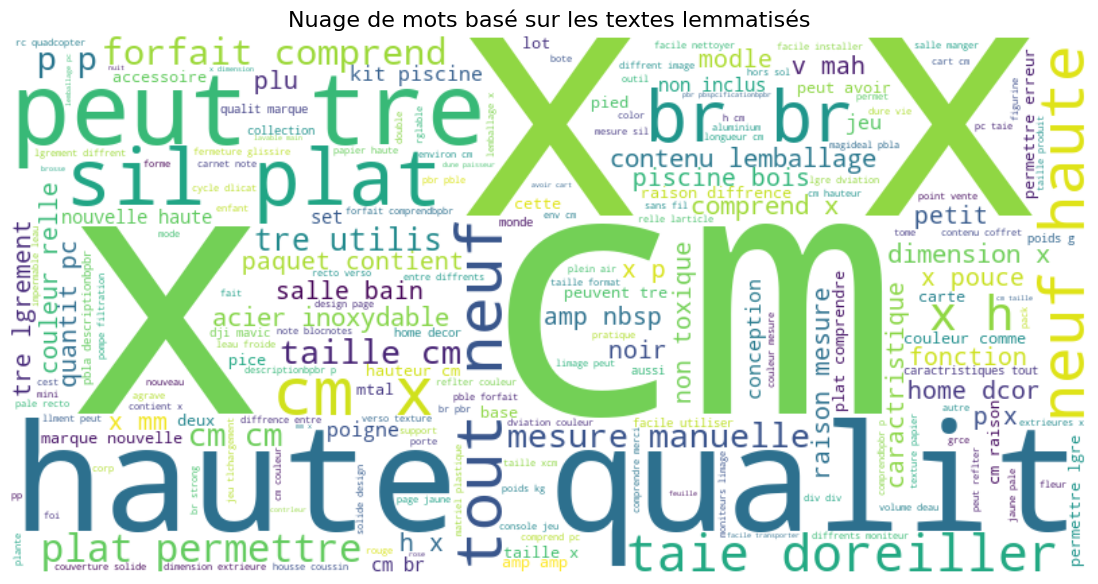

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Appliquer sur la colonne nettoyée/lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_lemmatized'])

# (Optionnel) Voir les dimensions et les mots
print(f"Nombre de phrases vectorisées : {X_vect.shape[0]}")
print(f"Nombre de tokens uniques (features) : {X_vect.shape[1]}")
print(f"Extraits de tokens : {vectorizer.get_feature_names_out()[:10]}")


Nombre de phrases vectorisées : 52775
Nombre de tokens uniques (features) : 150257
Extraits de tokens : ['aa' 'aaa' 'aaaa' 'aaabatteries' 'aaabattery' 'aaabr'
 'aaabrbrcaractristiques' 'aaafeatures' 'aaafunction' 'aaah']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Variable cible
y = df_vecteur['prdtypecode']

# Découpage en entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
              precision    recall  f1-score   support

          10       0.47      0.50      0.49       397
          40       0.57      0.64      0.60       295
          50       0.69      0.74      0.72       225
          60       0.85      0.91      0.88       103
        1140       0.69      0.75      0.72       309
        1160       0.86      0.94      0.90       487
        1180       0.62      0.49      0.55       108
        1280       0.63      0.55      0.59       669
        1281       0.54      0.51      0.52       282
        1300       0.86      0.85      0.86       670
        1301       0.93      0.84      0.88        79
        1302       0.74      0.72      0.73       299
        1320       0.71      0.70      0.70       391
        1560       0.77      0.77      0.77       641
        1920       0.86      0.88      0.87       528
        1940       0.90      0.72      0.80       122
        2060       0.76      0.73      0.75    

c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

# Assurez-vous d'avoir les stopwords français
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", " ", text)  # Supprimer tout ce qui n’est pas lettre ou espace
    tokens = text.split()

    # Filtrage des tokens douteux ou trop courts
    filtered_tokens = [
        t for t in tokens 
        if len(t) > 2 
        and not re.search(r"(aaa+|aa[a-z])", t)
        and t not in stop_words
    ]
    
    return " ".join(filtered_tokens)

# Application
df_vecteur['merged_cleaned'] = df_vecteur['merged'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


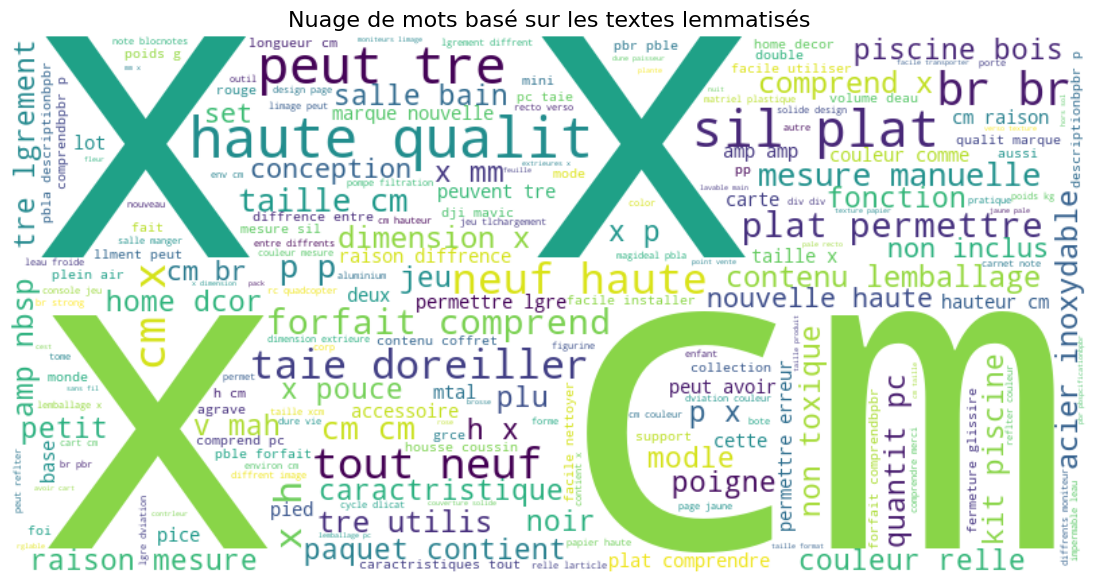

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()


In [9]:
y = df_vecteur['prdtypecode']

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
              precision    recall  f1-score   support

          10       0.47      0.50      0.49       397
          40       0.57      0.64      0.60       295
          50       0.69      0.74      0.72       225
          60       0.85      0.91      0.88       103
        1140       0.69      0.75      0.72       309
        1160       0.86      0.94      0.90       487
        1180       0.62      0.49      0.55       108
        1280       0.63      0.56      0.59       669
        1281       0.54      0.51      0.52       282
        1300       0.86      0.85      0.86       670
        1301       0.93      0.84      0.88        79
        1302       0.74      0.72      0.73       299
        1320       0.71      0.70      0.71       391
        1560       0.77      0.77      0.77       641
        1920       0.86      0.88      0.87       528
        1940       0.90      0.73      0.81       122
        2060       0.76      0.73      0.75    

In [11]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coeffs = model.coef_

# Pour chaque classe (si multiclasses)
for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(coeffs[i])[-10:]
    print(f"\nTop mots pour la classe '{class_label}':")
    print([feature_names[j] for j in top10])



Top mots pour la classe '10':
['tiloulou', 'leçons', 'colletet', 'vampyres', 'dlectricit', 'emmure', 'konsalik', 'jau', 'fonctionner', 'digraphe']

Top mots pour la classe '40':
['adibou', 'soccer', 'mystrieuse', 'cliparts', 'alon', 'quickio', 'opérationnel', 'umd', 'might', 'yxjjpj']

Top mots pour la classe '50':
['brancher', 'gaming', 'avis', 'bigben', 'gamegear', 'skylanders', 'gamer', 'advantage', 'stereo', 'steelbook']

Top mots pour la classe '60':
['charbon', 'infamous', 'consola', 'roja', 'verte', 'go', 'mentespectros', 'nom', 'lagon', 'tankfat']

Top mots pour la classe '1140':
['pacciochini', 'biz', 'scaler', 'tsun', 'statue', 'gaulois', 'watermelon', 'medusa', 'magnet', 'tshirt']

Top mots pour la classe '1160':
['wow', 'vo', 'pv', 'adrenalyn', 'perfection', 'fleer', 'ccg', 'mtg', 'yugioh', 'vf']

Top mots pour la classe '1180':
['glaive', 'rolemaster', 'cyberpunk', 'mahamoth', 'eldars', 'arquebusier', 'megatron', 'coffrefort', 'warhammer', 'heroclix']

Top mots pour la cl

Epoch 1/10 - Train Acc: 44.30%, Test Acc: 47.77%
Epoch 2/10 - Train Acc: 49.08%, Test Acc: 48.32%
Epoch 3/10 - Train Acc: 50.54%, Test Acc: 49.58%
Epoch 4/10 - Train Acc: 51.63%, Test Acc: 49.26%
Epoch 5/10 - Train Acc: 52.18%, Test Acc: 49.99%
Epoch 6/10 - Train Acc: 52.79%, Test Acc: 50.16%
Epoch 7/10 - Train Acc: 53.52%, Test Acc: 50.22%
Epoch 8/10 - Train Acc: 53.77%, Test Acc: 50.21%
Epoch 9/10 - Train Acc: 54.35%, Test Acc: 50.41%
Epoch 10/10 - Train Acc: 54.56%, Test Acc: 50.14%


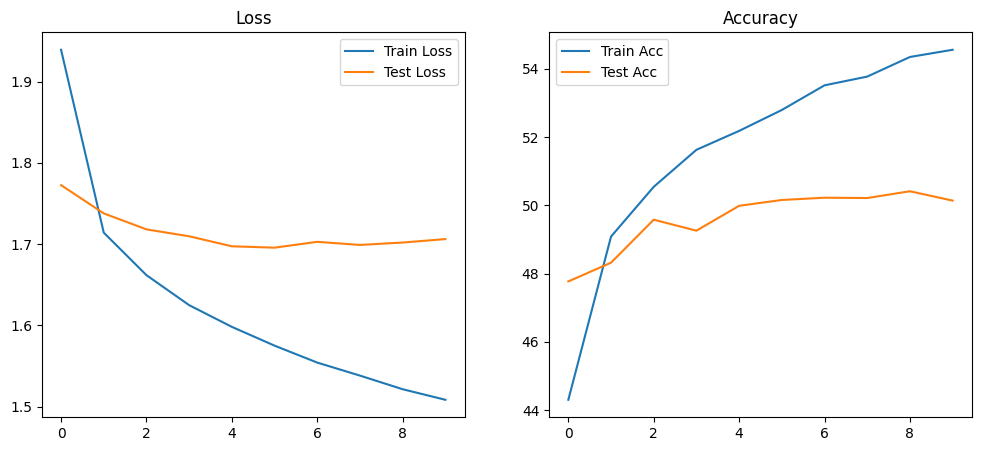


📊 Rapport de classification (avec noms de catégories):

                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.55      0.24      0.33       225
                                            Animalerie       0.43      0.29      0.34       104
                                        Cartes de jeux       0.78      0.31      0.44       487
                     Chaussettes bébés, petites photos       0.86      0.47      0.61        79
                                            Confiserie       0.46      0.30      0.36       122
                                      Consoles de jeux       0.85      0.71      0.77       103
                                            Décoration       0.62      0.63      0.62       681
                            Figurines et jeux de rôles       0.15      0.02      0.03       108
                         Figurines, objets pop culture       0.36      0.23   

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 1. Encodage de la variable cible
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# 2. Vectorisation du texte avec TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(df_vecteur['merged']).toarray()

# 3. Définition des features et de la cible
X = X_tfidf
y = df_vecteur['prdtypecode']

# 4. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Conversion en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 7. Dataloaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# 8. Modèle
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        return self.fc2(out)

input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(label_encoder_prdtype.classes_)
model = NeuralNet(input_size, hidden_size, num_classes)

# 9. Perte et optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 10. Entraînement
num_epochs = 10
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    correct, total, running_loss = 0, 0, 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Évaluation
    model.eval()
    correct, total, running_loss = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    test_losses.append(running_loss / len(test_loader))
    test_accuracies.append(100 * correct / total)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Acc: {train_accuracies[-1]:.2f}%, Test Acc: {test_accuracies[-1]:.2f}%")

# 11. Courbes d'apprentissage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Acc")
plt.plot(test_accuracies, label="Test Acc")
plt.legend()
plt.title("Accuracy")
plt.show()

# 12. Mapping code (entier) vers category_name
category_mapping = df_vecteur[['prdtypecode', 'category_name']].drop_duplicates()
mapping = category_mapping.set_index('prdtypecode')['category_name'].to_dict()

# 13. Prédictions finales sur test set
model.eval()
all_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())

# 14. y_test en numpy (entiers)
y_test_np = y_test_tensor.cpu().numpy()

# 15. Remplacement des codes par les noms via mapping
y_test_labels = [mapping[code] for code in y_test_np]
y_pred_labels = [mapping[code] for code in all_preds]

# 16. Rapport final
print("\n📊 Rapport de classification (avec noms de catégories):\n")
print(classification_report(y_test_labels, y_pred_labels))


📊 Répartition des classes (nombres absolus) :

prdtypecode
Livres occasion                                           1999
Jeux videos, CDs, équipements, câbles, neufs              1466
Accessoires gaming                                        1104
Consoles de jeux                                           563
Figurines, objets pop culture                             1548
Cartes de jeux                                            2345
Figurines et jeux de rôles                                 485
Jouets enfant                                             3253
Jeux société enfants                                      1373
Modélisme                                                 3342
Chaussettes bébés, petites photos                          429
Jeux de pleins air, Habits                                1501
Puériculture, accessoire bébé                             1959
Mobilier général                                          3327
Linge de maison                                           2

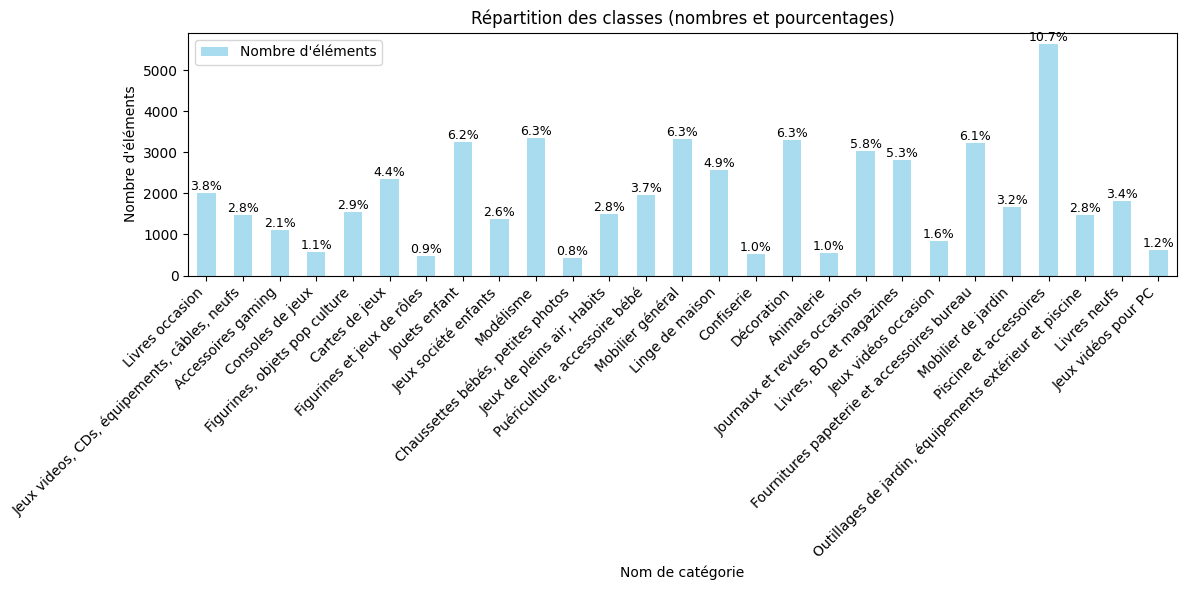

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Compter les occurrences par prdtypecode
repartition = df_vecteur['prdtypecode'].value_counts().sort_index()

# 2. Mapping prdtypecode → category_name
mapping = df_vecteur[['prdtypecode', 'category_name']].drop_duplicates().set_index('prdtypecode')['category_name'].to_dict()

# 3. Remplacement par noms
repartition_named = repartition.rename(index=mapping)

# 4. Calcul des pourcentages
pourcentages = repartition_named / repartition_named.sum() * 100

# 5. Affichage texte
print("📊 Répartition des classes (nombres absolus) :\n")
print(repartition_named)

print("\n📈 Répartition des classes (en pourcentage) :\n")
print(pourcentages.round(2).astype(str) + " %")

# 6. Affichage graphique
plt.figure(figsize=(12, 6))
repartition_named.plot(kind='bar', color='skyblue', alpha=0.7, label='Nombre d\'éléments')
plt.ylabel("Nombre d'éléments")
plt.xlabel("Nom de catégorie")
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des classes (nombres et pourcentages)")

# Ajout des pourcentages au-dessus des barres
for i, (count, pct) in enumerate(zip(repartition_named, pourcentages)):
    plt.text(i, count + 1, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.legend()
plt.show()



📊 Résultats pour Random Forest:
Accuracy: 0.5222
Classification Report:
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.50      0.27      0.35       225
                                            Animalerie       0.76      0.30      0.43       104
                                        Cartes de jeux       0.78      0.32      0.45       487
                     Chaussettes bébés, petites photos       0.88      0.46      0.60        79
                                            Confiserie       0.52      0.25      0.34       122
                                      Consoles de jeux       0.90      0.68      0.77       103
                                            Décoration       0.62      0.70      0.66       681
                            Figurines et jeux de rôles       0.54      0.06      0.12       108
                         Figurines, objets pop culture       0

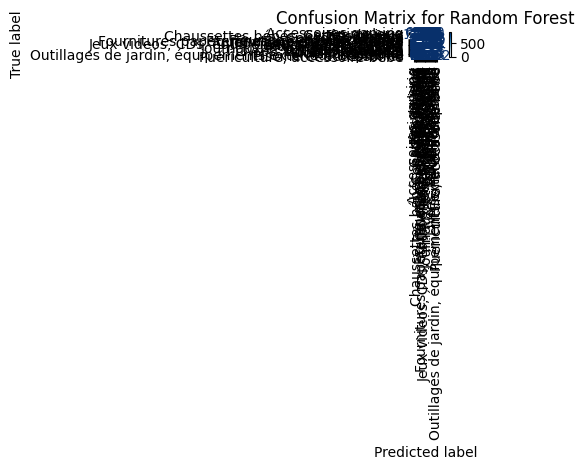


📊 Résultats pour KNN:
Accuracy: 0.4166
Classification Report:
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.28      0.24      0.26       225
                                            Animalerie       0.50      0.23      0.32       104
                                        Cartes de jeux       0.71      0.31      0.43       487
                     Chaussettes bébés, petites photos       0.47      0.44      0.46        79
                                            Confiserie       0.49      0.25      0.34       122
                                      Consoles de jeux       0.67      0.68      0.67       103
                                            Décoration       0.69      0.55      0.61       681
                            Figurines et jeux de rôles       0.17      0.04      0.06       108
                         Figurines, objets pop culture       0.15      0

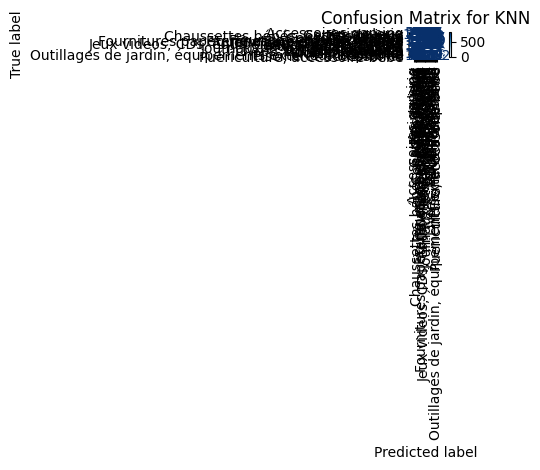

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Étape 1 : Encodage de la cible ---
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode_encoded'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

df_vecteur['merged'] = df_vecteur['merged'].fillna("").astype(str)

# --- Étape 2 : Vectorisation TF-IDF du texte ---
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df_vecteur.index)

# --- Étape 3 : Préparation des données ---
X = tfidf_df  # uniquement les features issues du texte
y = df_vecteur['prdtypecode_encoded']  # cible encodée

# --- Étape 4 : Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Étape 5 : Normalisation ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Étape 6 : Modèles ---
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# --- Étape 7 : Entraînement, prédictions et résultats ---
results = {}

# Mapping prdtypecode -> category_name
mapping = df_vecteur[['prdtypecode', 'category_name']].drop_duplicates().set_index('prdtypecode').to_dict()['category_name']

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Décodage des prdtypecode (inverse de l'encodage LabelEncoder)
    y_test_codes = label_encoder_prdtype.inverse_transform(y_test)
    y_pred_codes = label_encoder_prdtype.inverse_transform(y_pred)

    # Remplacement des codes par les noms
    y_test_names = [mapping[code] for code in y_test_codes]
    y_pred_names = [mapping[code] for code in y_pred_codes]

    # Évaluation
    accuracy = accuracy_score(y_test_names, y_pred_names)
    report = classification_report(y_test_names, y_pred_names)
    confusion = confusion_matrix(y_test_names, y_pred_names)

    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": confusion
    }

    print(f"\n📊 Résultats pour {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)

    # Affichage de la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=sorted(set(y_test_names)))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.tight_layout()
    plt.show()

# --- Étape 8 : Comparaison des modèles ---
best_model = max(results, key=lambda model: results[model]["accuracy"])
print(f"\n✅ Meilleur modèle : {best_model} avec une accuracy de {results[best_model]['accuracy']:.4f}")




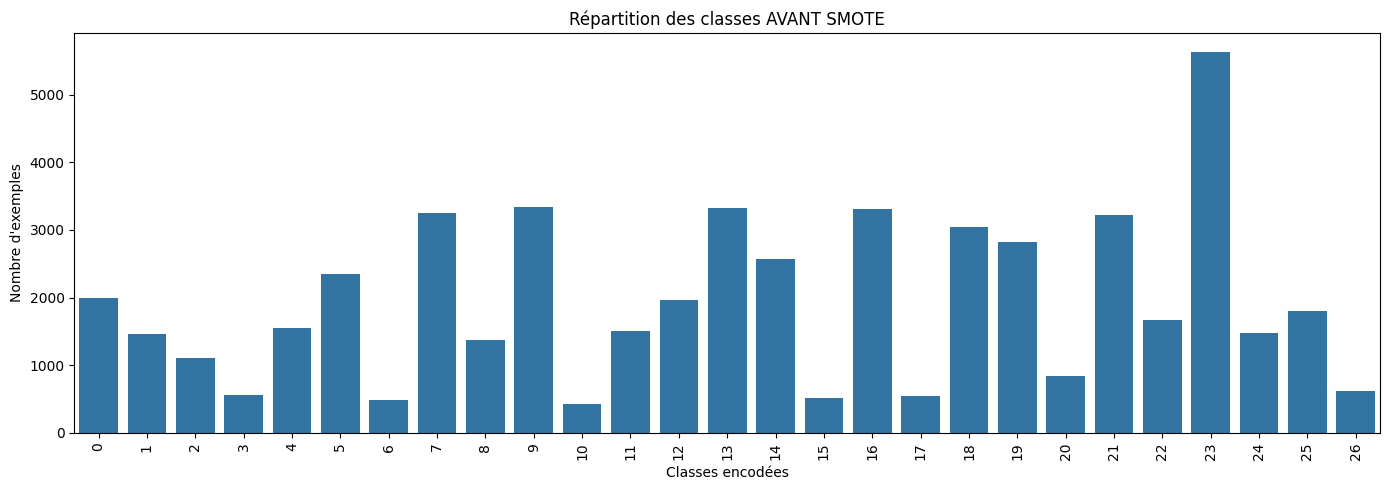

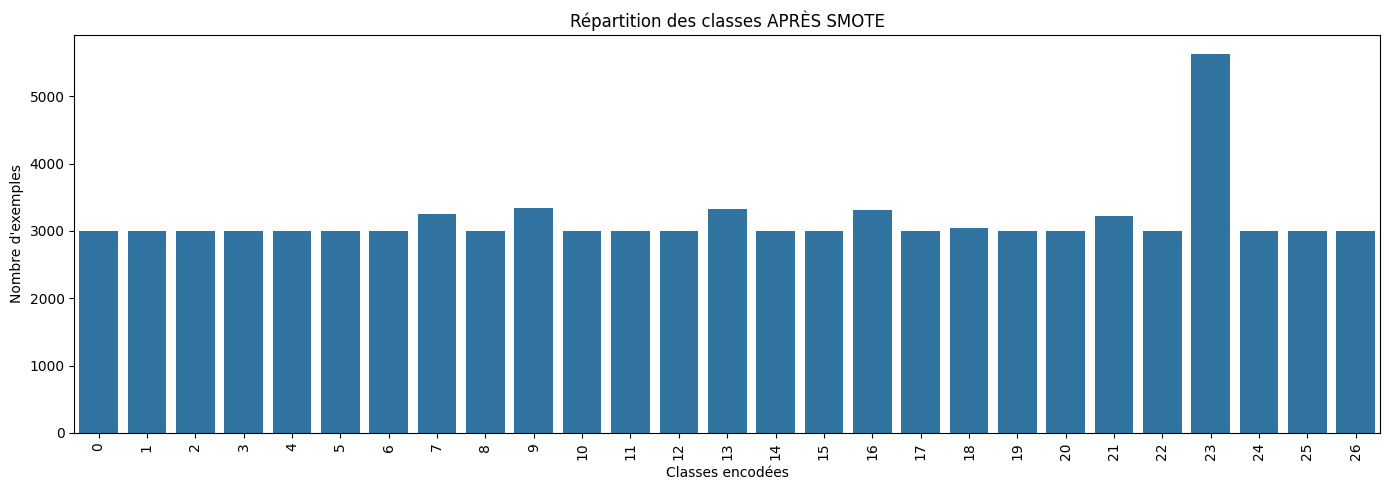


🔍 Modèle : SVM
✅ Accuracy : 0.4537 | F1-score (pondéré) : 0.4732

📊 Rapport de classification :

                                   precision    recall  f1-score   support

Chaussettes bébés, petites photos       0.68      0.58      0.62       593

                        micro avg       0.68      0.58      0.62       593
                        macro avg       0.68      0.58      0.62       593
                     weighted avg       0.68      0.58      0.62       593


🔍 Modèle : Random Forest
✅ Accuracy : 0.5800 | F1-score (pondéré) : 0.6086

📊 Rapport de classification :

                                   precision    recall  f1-score   support

Chaussettes bébés, petites photos       0.87      0.80      0.83       593

                        micro avg       0.87      0.80      0.83       593
                        macro avg       0.87      0.80      0.83       593
                     weighted avg       0.87      0.80      0.83       593


🔍 Modèle : KNN
✅ Accuracy : 0.4963 | 

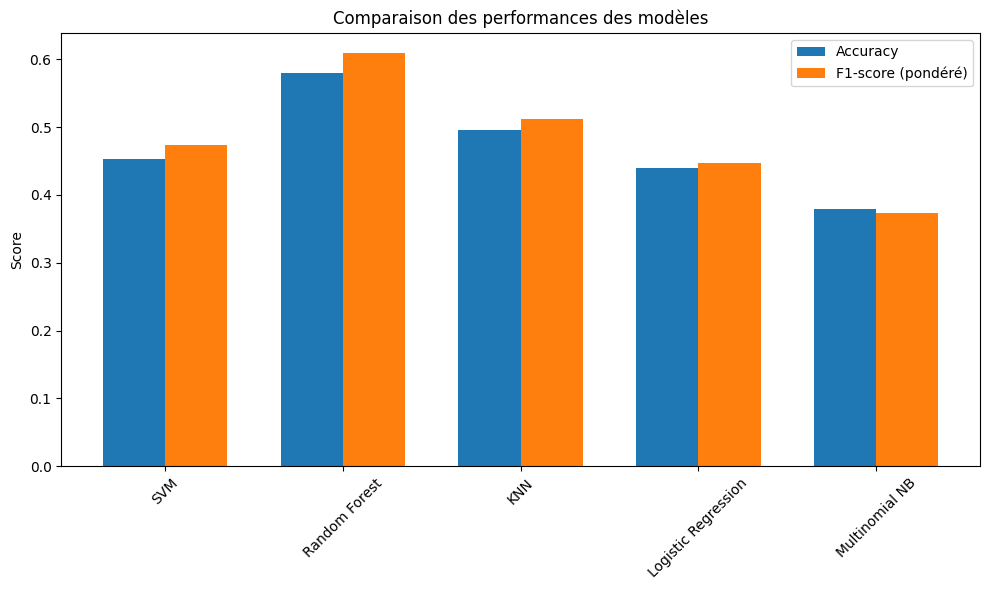

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import SMOTE

# 1. Chargement des données
df_vecteur = pd.read_csv("clean_dataset.csv")

# 2. Séparation des features et de la cible
X = df_vecteur["merged"]
y = df_vecteur["prdtypecode"]

# 3. TF-IDF vectorisation
tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(X)

# 4. Encodage des labels (optionnel ici si prdtypecode est déjà numérique)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 5. Affichage des classes avant SMOTE
plt.figure(figsize=(14, 5))
sns.countplot(x=y_encoded)
plt.title("Répartition des classes AVANT SMOTE")
plt.xlabel("Classes encodées")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Stratégie de suréchantillonnage
TARGET_SIZE = 3000
class_counts = dict(zip(*np.unique(y_encoded, return_counts=True)))
sampling_dict = {cls: TARGET_SIZE for cls, count in class_counts.items() if count < TARGET_SIZE}

# 7. Application de SMOTE
smote = SMOTE(sampling_strategy=sampling_dict, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# 8. Affichage après SMOTE
plt.figure(figsize=(14, 5))
sns.countplot(x=y_resampled)
plt.title("Répartition des classes APRÈS SMOTE")
plt.xlabel("Classes encodées")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 9. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 10. Définition des modèles
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Multinomial NB": MultinomialNB()
}

# 11. Entraînement et évaluation
results = {}

for name, model in models.items():
    print(f"\n🔍 Modèle : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"✅ Accuracy : {acc:.4f} | F1-score (pondéré) : {f1:.4f}")

    # Pour éviter erreur de type avec les noms des catégories
    labels_in_test = np.unique(np.concatenate([y_test, y_pred]))
    valid_labels = [l for l in labels_in_test if l in df_vecteur["prdtypecode"].unique()]
    
    # Mapping code -> nom
    code_to_name = df_vecteur.drop_duplicates("prdtypecode").set_index("prdtypecode")["category_name"].to_dict()
    # Récupération des codes à partir des valeurs encodées
    original_codes = label_encoder.inverse_transform(valid_labels)
    target_names = [code_to_name.get(code, str(code)) for code in original_codes]

    print("\n📊 Rapport de classification :\n")
    print(classification_report(y_test, y_pred, labels=valid_labels, target_names=target_names))

    # Stockage pour analyse plus tard
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": acc,
        "f1": f1,
        "labels": valid_labels,
        "target_names": target_names
    }

# 12. Visualisation finale des performances
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]
f1_scores = [results[m]["f1"] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1-score (pondéré)')

plt.xticks(x, model_names, rotation=45)
plt.ylabel("Score")
plt.title("Comparaison des performances des modèles")
plt.legend()
plt.tight_layout()
plt.show()





In [15]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

# 1. Charger les données
df = pd.read_csv("clean_dataset.csv")

# 2. Features (texte) et target
X_text = df['merged'].astype(str)  # s'assurer que c'est du texte
y = df['prdtypecode']

# 3. TF-IDF vectorisation (fit sur tout)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)  # sparse matrix

# 4. Split train/test (stratifié sur y)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42, stratify=y)

# 5. Créer sampling_strategy pour SMOTE : classes avec moins de 2500 exemples => augmenter à 2500
counter = Counter(y_train)
sampling_strategy = {cls: 2500 for cls, count in counter.items() if count < 2500}

# 6. Appliquer SMOTE sur données vectorisées (matrice sparse)
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution après SMOTE :")
print(Counter(y_train_resampled))

# 7. Modèles à tester
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 8. Fonction d’évaluation
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        start = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        end = time.time()

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'F1-macro': round(f1, 4),
            'Precision_macro': report["macro avg"]["precision"],
            'Recall_macro': report["macro avg"]["recall"]
        })
    return pd.DataFrame(results).sort_values(by='F1-macro', ascending=False).reset_index(drop=True)

# 9. Evaluer
results_df = evaluate_classifiers(X_train_resampled, y_train_resampled, X_test, y_test)
print(results_df)

# 10. Correspondance prdtypecode -> category_name
mapping = df[['prdtypecode', 'category_name']].drop_duplicates().set_index('prdtypecode')['category_name']
print("\nCorrespondance codes produit / catégorie:")
print(mapping)



Distribution après SMOTE :
Counter({2583: 4222, 1300: 2506, 2705: 2500, 1920: 2500, 2060: 2500, 1281: 2500, 40: 2500, 1280: 2500, 2403: 2500, 50: 2500, 1160: 2500, 2462: 2500, 1560: 2500, 2280: 2500, 2585: 2500, 10: 2500, 2220: 2500, 2522: 2500, 60: 2500, 1940: 2500, 1320: 2500, 1302: 2500, 1140: 2500, 2582: 2500, 1301: 2500, 2905: 2500, 1180: 2500})
                 Model  Accuracy  F1-macro  Precision_macro  Recall_macro
0                  SVM    0.7577    0.7485         0.713726      0.731703
1  Logistic Regression    0.7403    0.7234         0.713726      0.731703
2        Random Forest    0.7244    0.7117         0.713726      0.731703
3        Decision Tree    0.6385    0.6267         0.713726      0.731703
4                  KNN    0.5045    0.5077         0.713726      0.731703

Correspondance codes produit / catégorie:
prdtypecode
2280                         Journaux et revues occasions
50                                     Accessoires gaming
1280                            

Chargement des données...
Forme du dataset: (52775, 6)
Colonnes: ['Unnamed: 0', 'productid', 'imageid', 'prdtypecode', 'merged', 'category_name']

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52775 entries, 0 to 52774
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     52775 non-null  int64 
 1   productid      52775 non-null  int64 
 2   imageid        52775 non-null  int64 
 3   prdtypecode    52775 non-null  int64 
 4   merged         52775 non-null  object
 5   category_name  52775 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.4+ MB
None

Distribution des classes (prdtypecode):
prdtypecode
2583    5630
1300    3342
1560    3327
2060    3311
1280    3253
2522    3226
2280    3042
2403    2815
1920    2576
1160    2345
Name: count, dtype: int64

Mapping prdtypecode -> category_name (échantillon):
10: Livres occasion
40: Jeux videos, CDs, équipements, 

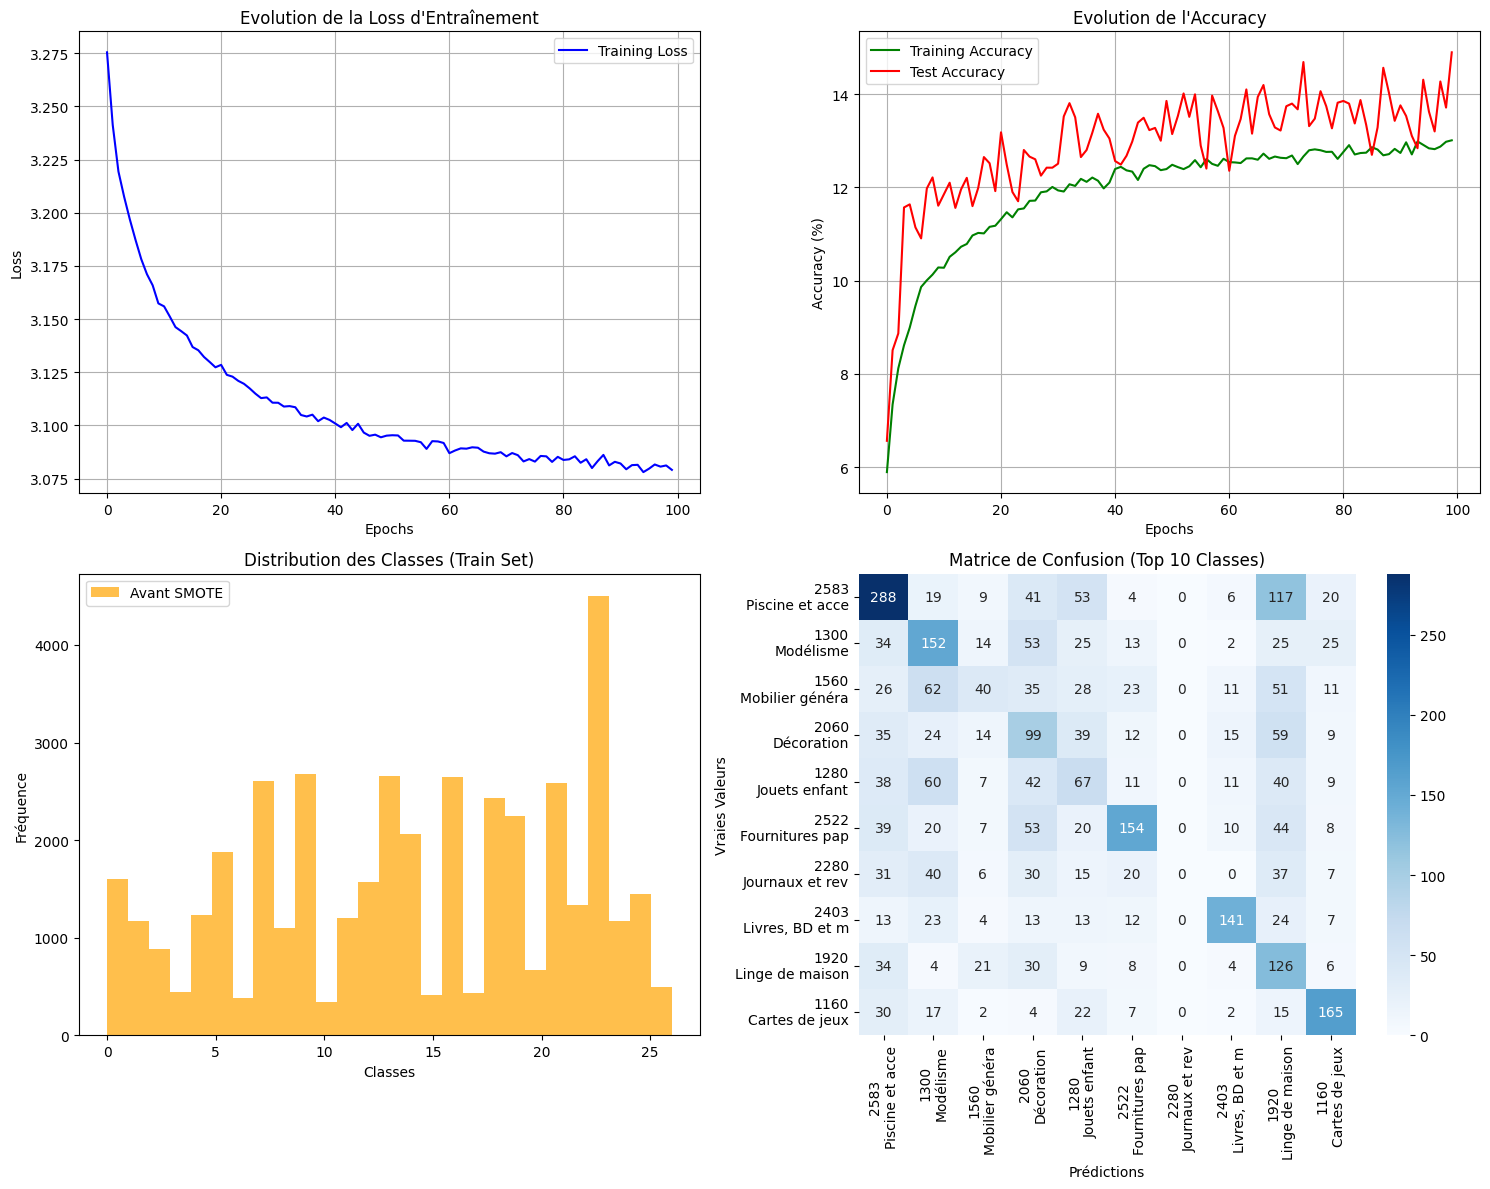


RÉSUMÉ DU MODÈLE
Dataset original: (52775, 6)
Features utilisées: ['merged']
Nombre de classes: 27
Stratégie SMOTE: 2500
Architecture: 1 -> 128 -> 128 -> 64 -> 27
Epochs: 100
Batch size: 64
Learning rate: 0.001
Device: cpu
Accuracy finale: 0.1489
Modèle sauvegardé dans 'product_classifier_model.pth'


In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration
RANDOM_STATE = 42
SMOTE_STRATEGY = 2500  # ou 3000, vous pouvez ajuster
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.001

# Chargement des données
print("Chargement des données...")
df = pd.read_csv('clean_dataset.csv')
print(f"Forme du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")

# Vérification des données
print("\nInformations sur le dataset:")
print(df.info())
print(f"\nDistribution des classes (prdtypecode):")
print(df['prdtypecode'].value_counts().head(10))

# Création du mapping prdtypecode -> category_name pour le rapport
code_to_name = df.groupby('prdtypecode')['category_name'].first().to_dict()
print(f"\nMapping prdtypecode -> category_name (échantillon):")
for code, name in list(code_to_name.items())[:5]:
    print(f"{code}: {name}")

# Préparation des données
print("\nPréparation des données...")
# Sélection des features (seulement 'merged' comme feature)
X = df[['merged']].copy()
y = df['prdtypecode'].copy()

# Vérification du type de données dans 'merged'
print(f"Type de données dans 'merged': {X['merged'].dtype}")
print(f"Échantillon de valeurs 'merged': {X['merged'].head()}")

# Encodage des features textuelles si nécessaire
feature_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['merged'] = feature_encoder.fit_transform(X['merged'].astype(str))

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Nombre de classes uniques: {len(np.unique(y_encoded))}")
print(f"Distribution avant SMOTE: {Counter(y_encoded)}")

# Division train/test avant SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Application de SMOTE
print(f"\nApplication de SMOTE avec strategy={SMOTE_STRATEGY}...")

# Création d'une stratégie personnalisée pour SMOTE
# On va d'abord équilibrer toutes les classes, puis sous-échantillonner si nécessaire
unique_classes, class_counts = np.unique(y_train, return_counts=True)
max_count = max(class_counts)

# Première étape : équilibrer toutes les classes à la classe majoritaire
smote_auto = SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote_auto.fit_resample(X_train_scaled, y_train)

# Deuxième étape : si on veut limiter à SMOTE_STRATEGY, on sous-échantillonne
from sklearn.utils import resample

if max_count > SMOTE_STRATEGY:
    print(f"Sous-échantillonnage à {SMOTE_STRATEGY} échantillons par classe...")
    X_train_final = []
    y_train_final = []
    
    for class_label in unique_classes:
        # Sélectionner tous les échantillons de cette classe
        class_mask = y_train_balanced == class_label
        X_class = X_train_balanced[class_mask]
        y_class = y_train_balanced[class_mask]
        
        # Sous-échantillonner à SMOTE_STRATEGY si nécessaire
        if len(X_class) > SMOTE_STRATEGY:
            X_class_resampled, y_class_resampled = resample(
                X_class, y_class, 
                n_samples=SMOTE_STRATEGY, 
                random_state=RANDOM_STATE
            )
        else:
            X_class_resampled, y_class_resampled = X_class, y_class
        
        X_train_final.append(X_class_resampled)
        y_train_final.append(y_class_resampled)
    
    X_train_smote = np.vstack(X_train_final)
    y_train_smote = np.hstack(y_train_final)
else:
    # Si toutes les classes ont moins de SMOTE_STRATEGY échantillons, on garde le résultat de SMOTE
    X_train_smote = X_train_balanced
    y_train_smote = y_train_balanced

print(f"Distribution après SMOTE: {Counter(y_train_smote)}")
print(f"Forme après SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")

# Définition du modèle PyTorch
class ProductClassifier(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size=128):
        super(ProductClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size//2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

# Préparation des données pour PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilisation du device: {device}")

# Conversion en tenseurs
X_train_tensor = torch.FloatTensor(X_train_smote).to(device)
y_train_tensor = torch.LongTensor(y_train_smote).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Création des DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialisation du modèle
num_features = X_train_smote.shape[1]
num_classes = len(np.unique(y_encoded))

model = ProductClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(f"\nModèle créé avec {num_features} features et {num_classes} classes")
print(f"Nombre de paramètres: {sum(p.numel() for p in model.parameters())}")

# Entraînement
print("\nDébut de l'entraînement...")
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()
    
    # Calcul des métriques
    epoch_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    
    # Évaluation sur le test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}, '
              f'Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print("Entraînement terminé!")

# Évaluation finale
model.eval()
all_predictions = []
all_true = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_true.extend(batch_y.cpu().numpy())

# Conversion des labels encodés vers les codes originaux
y_test_original = label_encoder.inverse_transform(all_true)
y_pred_original = label_encoder.inverse_transform(all_predictions)

# Calcul des métriques finales
final_accuracy = accuracy_score(all_true, all_predictions)
print(f"\nAccuracy finale: {final_accuracy:.4f}")

# Rapport de classification avec les noms des catégories
print("\nRapport de classification (Top 10 classes):")
unique_classes = np.unique(y_test_original)[:10]  # Limite aux 10 premières classes
class_names = [f"{code} ({code_to_name.get(code, 'Unknown')})" for code in unique_classes]

# Filtrer les prédictions pour les 10 premières classes
mask = np.isin(y_test_original, unique_classes)
if np.sum(mask) > 0:
    y_test_filtered = y_test_original[mask]
    y_pred_filtered = y_pred_original[mask]
    
    print(classification_report(y_test_filtered, y_pred_filtered, 
                              labels=unique_classes, target_names=class_names))

# Visualisations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Courbe de loss
axes[0, 0].plot(train_losses, label='Training Loss', color='blue')
axes[0, 0].set_title('Evolution de la Loss d\'Entraînement')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Courbes d'accuracy
axes[0, 1].plot(train_accuracies, label='Training Accuracy', color='green')
axes[0, 1].plot(test_accuracies, label='Test Accuracy', color='red')
axes[0, 1].set_title('Evolution de l\'Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# 3. Distribution des classes avant/après SMOTE
axes[1, 0].hist(y_train, bins=min(50, len(np.unique(y_train))), alpha=0.7, 
                label='Avant SMOTE', color='orange')
axes[1, 0].set_title('Distribution des Classes (Train Set)')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].legend()

# 4. Matrice de confusion (classes les plus fréquentes)
top_classes = pd.Series(y_test_original).value_counts().head(10).index
mask_top = np.isin(y_test_original, top_classes) & np.isin(y_pred_original, top_classes)

if np.sum(mask_top) > 0:
    y_test_top = y_test_original[mask_top]
    y_pred_top = y_pred_original[mask_top]
    
    cm = confusion_matrix(y_test_top, y_pred_top, labels=top_classes)
    top_class_names = [f"{code}\n{code_to_name.get(code, 'Unknown')[:15]}" for code in top_classes]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=top_class_names, yticklabels=top_class_names, ax=axes[1, 1])
    axes[1, 1].set_title('Matrice de Confusion (Top 10 Classes)')
    axes[1, 1].set_xlabel('Prédictions')
    axes[1, 1].set_ylabel('Vraies Valeurs')

plt.tight_layout()
plt.show()

# Résumé final
print(f"\n{'='*50}")
print("RÉSUMÉ DU MODÈLE")
print(f"{'='*50}")
print(f"Dataset original: {df.shape}")
print(f"Features utilisées: ['merged']")
print(f"Nombre de classes: {num_classes}")
print(f"Stratégie SMOTE: {SMOTE_STRATEGY}")
print(f"Architecture: {num_features} -> 128 -> 128 -> 64 -> {num_classes}")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")
print(f"Device: {device}")
print(f"Accuracy finale: {final_accuracy:.4f}")
print(f"{'='*50}")

# Sauvegarder le modèle
torch.save({
    'model_state_dict': model.state_dict(),
    'label_encoder': label_encoder,
    'feature_encoder': feature_encoder,
    'scaler': scaler,
    'code_to_name': code_to_name,
    'num_features': num_features,
    'num_classes': num_classes
}, 'product_classifier_model.pth')

print("Modèle sauvegardé dans 'product_classifier_model.pth'")

Chargement des données...
Forme du dataset: (52775, 6)
Colonnes: ['Unnamed: 0', 'productid', 'imageid', 'prdtypecode', 'merged', 'category_name']

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52775 entries, 0 to 52774
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     52775 non-null  int64 
 1   productid      52775 non-null  int64 
 2   imageid        52775 non-null  int64 
 3   prdtypecode    52775 non-null  int64 
 4   merged         52775 non-null  object
 5   category_name  52775 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.4+ MB
None

Distribution des classes (prdtypecode):
prdtypecode
2583    5630
1300    3342
1560    3327
2060    3311
1280    3253
2522    3226
2280    3042
2403    2815
1920    2576
1160    2345
Name: count, dtype: int64

Mapping prdtypecode -> category_name (échantillon):
10: Livres occasion
40: Jeux videos, CDs, équipements, 

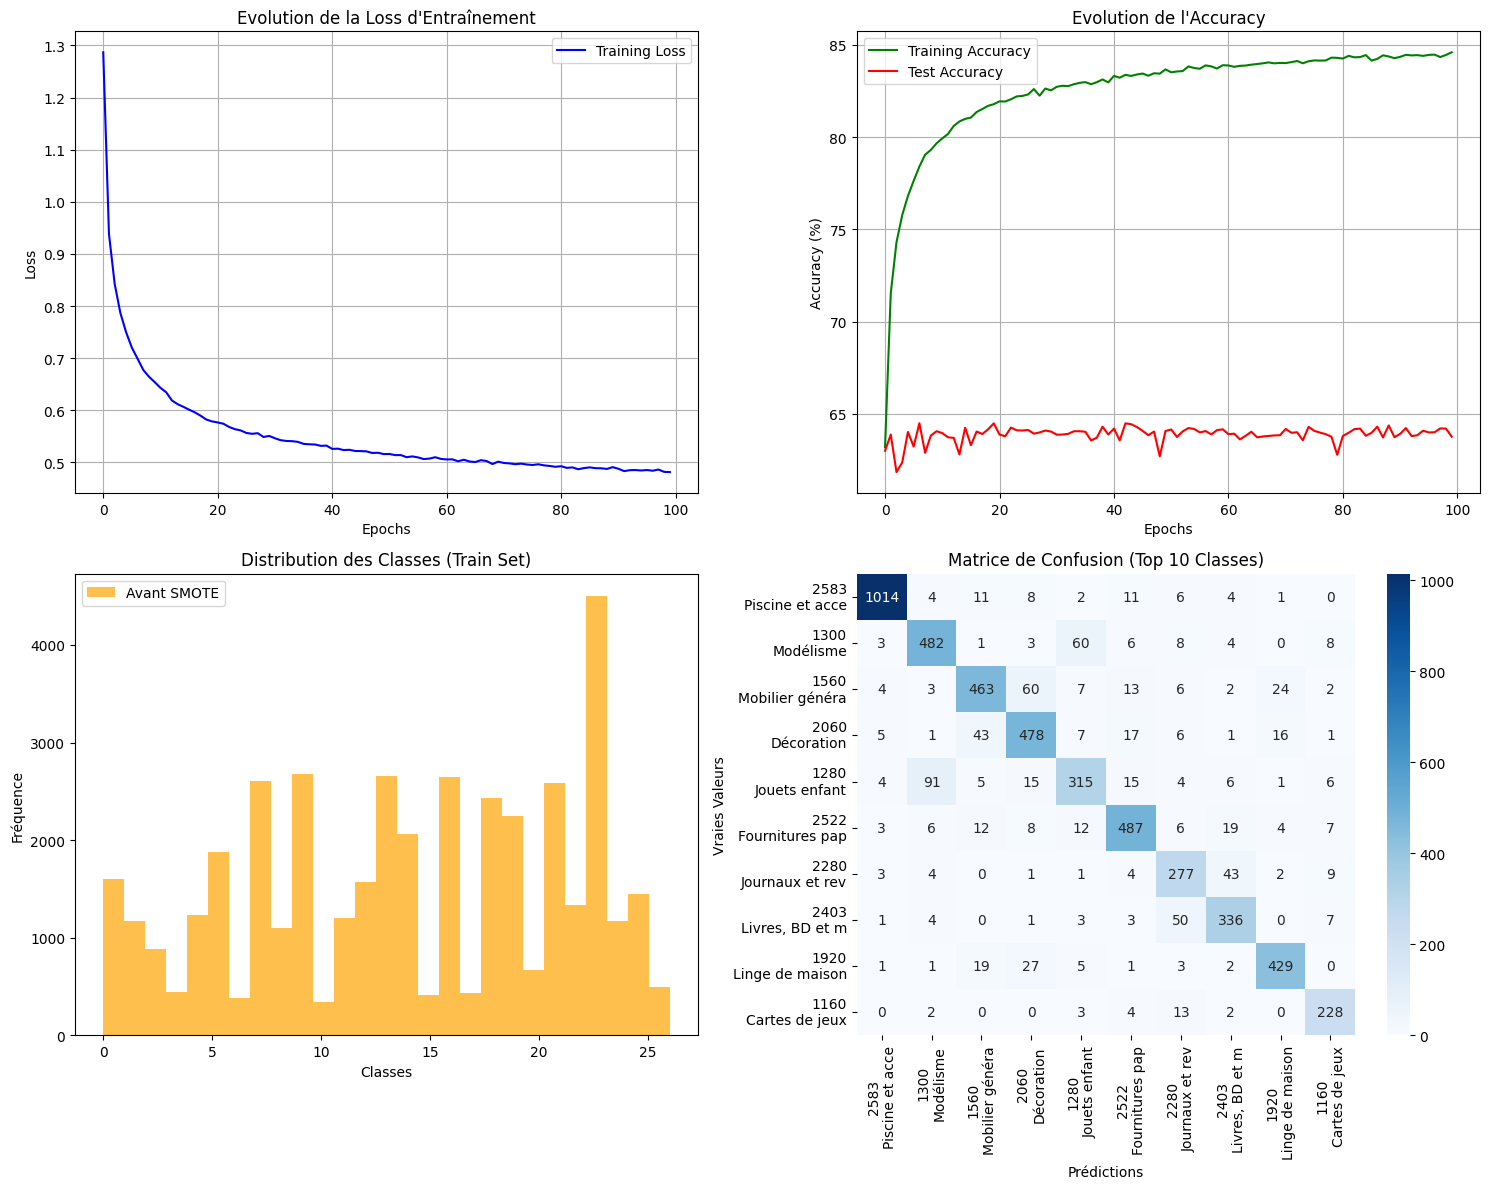


RÉSUMÉ DU MODÈLE
Dataset original: (52775, 6)
Features utilisées: TF-IDF de 'merged' (1000 features)
Nombre de classes: 27
Stratégie SMOTE: 2500
Architecture: 1000 -> 256 -> 128 -> 27
TF-IDF max_features: 1000
TF-IDF ngram_range: (1, 2)
Epochs: 100
Batch size: 64
Learning rate: 0.001
Device: cpu
Accuracy finale: 0.6376
Modèle sauvegardé dans 'product_classifier_model.pth'


In [22]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration
RANDOM_STATE = 42
SMOTE_STRATEGY = 2500  # ou 3000, vous pouvez ajuster
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.001

# Chargement des données
print("Chargement des données...")
df = pd.read_csv('clean_dataset.csv')
print(f"Forme du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")

# Vérification des données
print("\nInformations sur le dataset:")
print(df.info())
print(f"\nDistribution des classes (prdtypecode):")
print(df['prdtypecode'].value_counts().head(10))

# Création du mapping prdtypecode -> category_name pour le rapport
code_to_name = df.groupby('prdtypecode')['category_name'].first().to_dict()
print(f"\nMapping prdtypecode -> category_name (échantillon):")
for code, name in list(code_to_name.items())[:5]:
    print(f"{code}: {name}")

# Préparation des données
print("\nPréparation des données...")
# Sélection des features (seulement 'merged' comme feature)
X_text = df['merged'].astype(str)  # Convertir en string pour TF-IDF
y = df['prdtypecode'].copy()

# Vérification des données textuelles
print(f"Nombre de documents: {len(X_text)}")
print(f"Échantillon de textes:")
for i, text in enumerate(X_text.head(3)):
    print(f"  {i+1}: {text[:100]}...")

# Application de TF-IDF
print("\nApplication de TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Réduit à 1000 features (au lieu de 5000)
    stop_words='english',  # Supprime les mots vides anglais
    ngram_range=(1, 2),  # Utilise les unigrammes et bigrammes
    min_df=2,  # Ignore les termes qui apparaissent dans moins de 2 documents
    max_df=0.95  # Ignore les termes qui apparaissent dans plus de 95% des documents
)

X_tfidf = tfidf_vectorizer.fit_transform(X_text)
X_tfidf_dense = X_tfidf.toarray()  # Conversion en array dense pour compatibilité

print(f"Shape après TF-IDF: {X_tfidf_dense.shape}")
print(f"Nombre de features TF-IDF: {X_tfidf_dense.shape[1]}")

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Nombre de classes uniques: {len(np.unique(y_encoded))}")
print(f"Distribution avant SMOTE: {Counter(y_encoded)}")

# Division train/test avant SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_dense, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

# Normalisation des features TF-IDF (optionnel, mais peut aider)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Application de SMOTE
print(f"\nApplication de SMOTE avec strategy={SMOTE_STRATEGY}...")

# Création d'une stratégie personnalisée pour SMOTE
# On va d'abord équilibrer toutes les classes, puis sous-échantillonner si nécessaire
unique_classes, class_counts = np.unique(y_train, return_counts=True)
max_count = max(class_counts)

# Première étape : équilibrer toutes les classes à la classe majoritaire
smote_auto = SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote_auto.fit_resample(X_train_scaled, y_train)

# Deuxième étape : si on veut limiter à SMOTE_STRATEGY, on sous-échantillonne
from sklearn.utils import resample

if max_count > SMOTE_STRATEGY:
    print(f"Sous-échantillonnage à {SMOTE_STRATEGY} échantillons par classe...")
    X_train_final = []
    y_train_final = []
    
    for class_label in unique_classes:
        # Sélectionner tous les échantillons de cette classe
        class_mask = y_train_balanced == class_label
        X_class = X_train_balanced[class_mask]
        y_class = y_train_balanced[class_mask]
        
        # Sous-échantillonner à SMOTE_STRATEGY si nécessaire
        if len(X_class) > SMOTE_STRATEGY:
            X_class_resampled, y_class_resampled = resample(
                X_class, y_class, 
                n_samples=SMOTE_STRATEGY, 
                random_state=RANDOM_STATE
            )
        else:
            X_class_resampled, y_class_resampled = X_class, y_class
        
        X_train_final.append(X_class_resampled)
        y_train_final.append(y_class_resampled)
    
    X_train_smote = np.vstack(X_train_final)
    y_train_smote = np.hstack(y_train_final)
else:
    # Si toutes les classes ont moins de SMOTE_STRATEGY échantillons, on garde le résultat de SMOTE
    X_train_smote = X_train_balanced
    y_train_smote = y_train_balanced

print(f"Distribution après SMOTE: {Counter(y_train_smote)}")
print(f"Forme après SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")

# Définition du modèle PyTorch (version allégée)
class ProductClassifier(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size=256):
        super(ProductClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size//2),
            nn.Dropout(0.2),
            
            nn.Linear(hidden_size//2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

# Préparation des données pour PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilisation du device: {device}")

# Conversion en tenseurs
X_train_tensor = torch.FloatTensor(X_train_smote).to(device)
y_train_tensor = torch.LongTensor(y_train_smote).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Création des DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialisation du modèle
num_features = X_train_smote.shape[1]
num_classes = len(np.unique(y_encoded))

model = ProductClassifier(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(f"\nModèle créé avec {num_features} features et {num_classes} classes")
print(f"Nombre de paramètres: {sum(p.numel() for p in model.parameters())}")

# Entraînement
print("\nDébut de l'entraînement...")
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()
    
    # Calcul des métriques
    epoch_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    
    # Évaluation sur le test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()
    
    test_accuracy = 100 * correct_test / total_test
    
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}, '
              f'Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

print("Entraînement terminé!")

# Évaluation finale
model.eval()
all_predictions = []
all_true = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_true.extend(batch_y.cpu().numpy())

# Conversion des labels encodés vers les codes originaux
y_test_original = label_encoder.inverse_transform(all_true)
y_pred_original = label_encoder.inverse_transform(all_predictions)

# Calcul des métriques finales
final_accuracy = accuracy_score(all_true, all_predictions)
print(f"\nAccuracy finale: {final_accuracy:.4f}")

# Rapport de classification avec les noms des catégories
print("\nRapport de classification (Top 10 classes):")
unique_classes = np.unique(y_test_original)[:10]  # Limite aux 10 premières classes
class_names = [f"{code} ({code_to_name.get(code, 'Unknown')})" for code in unique_classes]

# Filtrer les prédictions pour les 10 premières classes
mask = np.isin(y_test_original, unique_classes)
if np.sum(mask) > 0:
    y_test_filtered = y_test_original[mask]
    y_pred_filtered = y_pred_original[mask]
    
    print(classification_report(y_test_filtered, y_pred_filtered, 
                              labels=unique_classes, target_names=class_names))

# Visualisations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Courbe de loss
axes[0, 0].plot(train_losses, label='Training Loss', color='blue')
axes[0, 0].set_title('Evolution de la Loss d\'Entraînement')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Courbes d'accuracy
axes[0, 1].plot(train_accuracies, label='Training Accuracy', color='green')
axes[0, 1].plot(test_accuracies, label='Test Accuracy', color='red')
axes[0, 1].set_title('Evolution de l\'Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# 3. Distribution des classes avant/après SMOTE
axes[1, 0].hist(y_train, bins=min(50, len(np.unique(y_train))), alpha=0.7, 
                label='Avant SMOTE', color='orange')
axes[1, 0].set_title('Distribution des Classes (Train Set)')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].legend()

# 4. Matrice de confusion (classes les plus fréquentes)
top_classes = pd.Series(y_test_original).value_counts().head(10).index
mask_top = np.isin(y_test_original, top_classes) & np.isin(y_pred_original, top_classes)

if np.sum(mask_top) > 0:
    y_test_top = y_test_original[mask_top]
    y_pred_top = y_pred_original[mask_top]
    
    cm = confusion_matrix(y_test_top, y_pred_top, labels=top_classes)
    top_class_names = [f"{code}\n{code_to_name.get(code, 'Unknown')[:15]}" for code in top_classes]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=top_class_names, yticklabels=top_class_names, ax=axes[1, 1])
    axes[1, 1].set_title('Matrice de Confusion (Top 10 Classes)')
    axes[1, 1].set_xlabel('Prédictions')
    axes[1, 1].set_ylabel('Vraies Valeurs')

plt.tight_layout()
plt.show()

# Résumé final
print(f"\n{'='*50}")
print("RÉSUMÉ DU MODÈLE")
print(f"{'='*50}")
print(f"Dataset original: {df.shape}")
print(f"Features utilisées: TF-IDF de 'merged' ({num_features} features)")
print(f"Nombre de classes: {num_classes}")
print(f"Stratégie SMOTE: {SMOTE_STRATEGY}")
print(f"Architecture: {num_features} -> 256 -> 128 -> {num_classes}")
print(f"TF-IDF max_features: 1000")
print(f"TF-IDF ngram_range: (1, 2)")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")
print(f"Device: {device}")
print(f"Accuracy finale: {final_accuracy:.4f}")
print(f"{'='*50}")

# Sauvegarder le modèle
torch.save({
    'model_state_dict': model.state_dict(),
    'label_encoder': label_encoder,
    'tfidf_vectorizer': tfidf_vectorizer,
    'scaler': scaler,
    'code_to_name': code_to_name,
    'num_features': num_features,
    'num_classes': num_classes
}, 'product_classifier_model.pth')

print("Modèle sauvegardé dans 'product_classifier_model.pth'")

🚀 Chargement et préparation des données...
Dataset shape: (52775, 6)

Distribution des classes AVANT SMOTE:
prdtypecode
10      1999
40      1466
50      1104
60       563
1140    1548
1160    2345
1180     485
1280    3253
1281    1373
1300    3342
1301     429
1302    1501
1320    1959
1560    3327
1920    2576
1940     522
2060    3311
2220     550
2280    3042
2403    2815
2462     842
2522    3226
2582    1668
2583    5630
2585    1470
2705    1807
2905     622
Name: count, dtype: int64

Mapping des codes vers les catégories:
10: Livres occasion (1999 échantillons)
40: Jeux videos, CDs, équipements, câbles, neufs (1466 échantillons)
50: Accessoires gaming (1104 échantillons)
60: Consoles de jeux (563 échantillons)
1140: Figurines, objets pop culture (1548 échantillons)
1160: Cartes de jeux (2345 échantillons)
1180: Figurines et jeux de rôles (485 échantillons)
1280: Jouets enfant (3253 échantillons)
1281: Jeux société enfants (1373 échantillons)
1300: Modélisme (3342 échantillons)

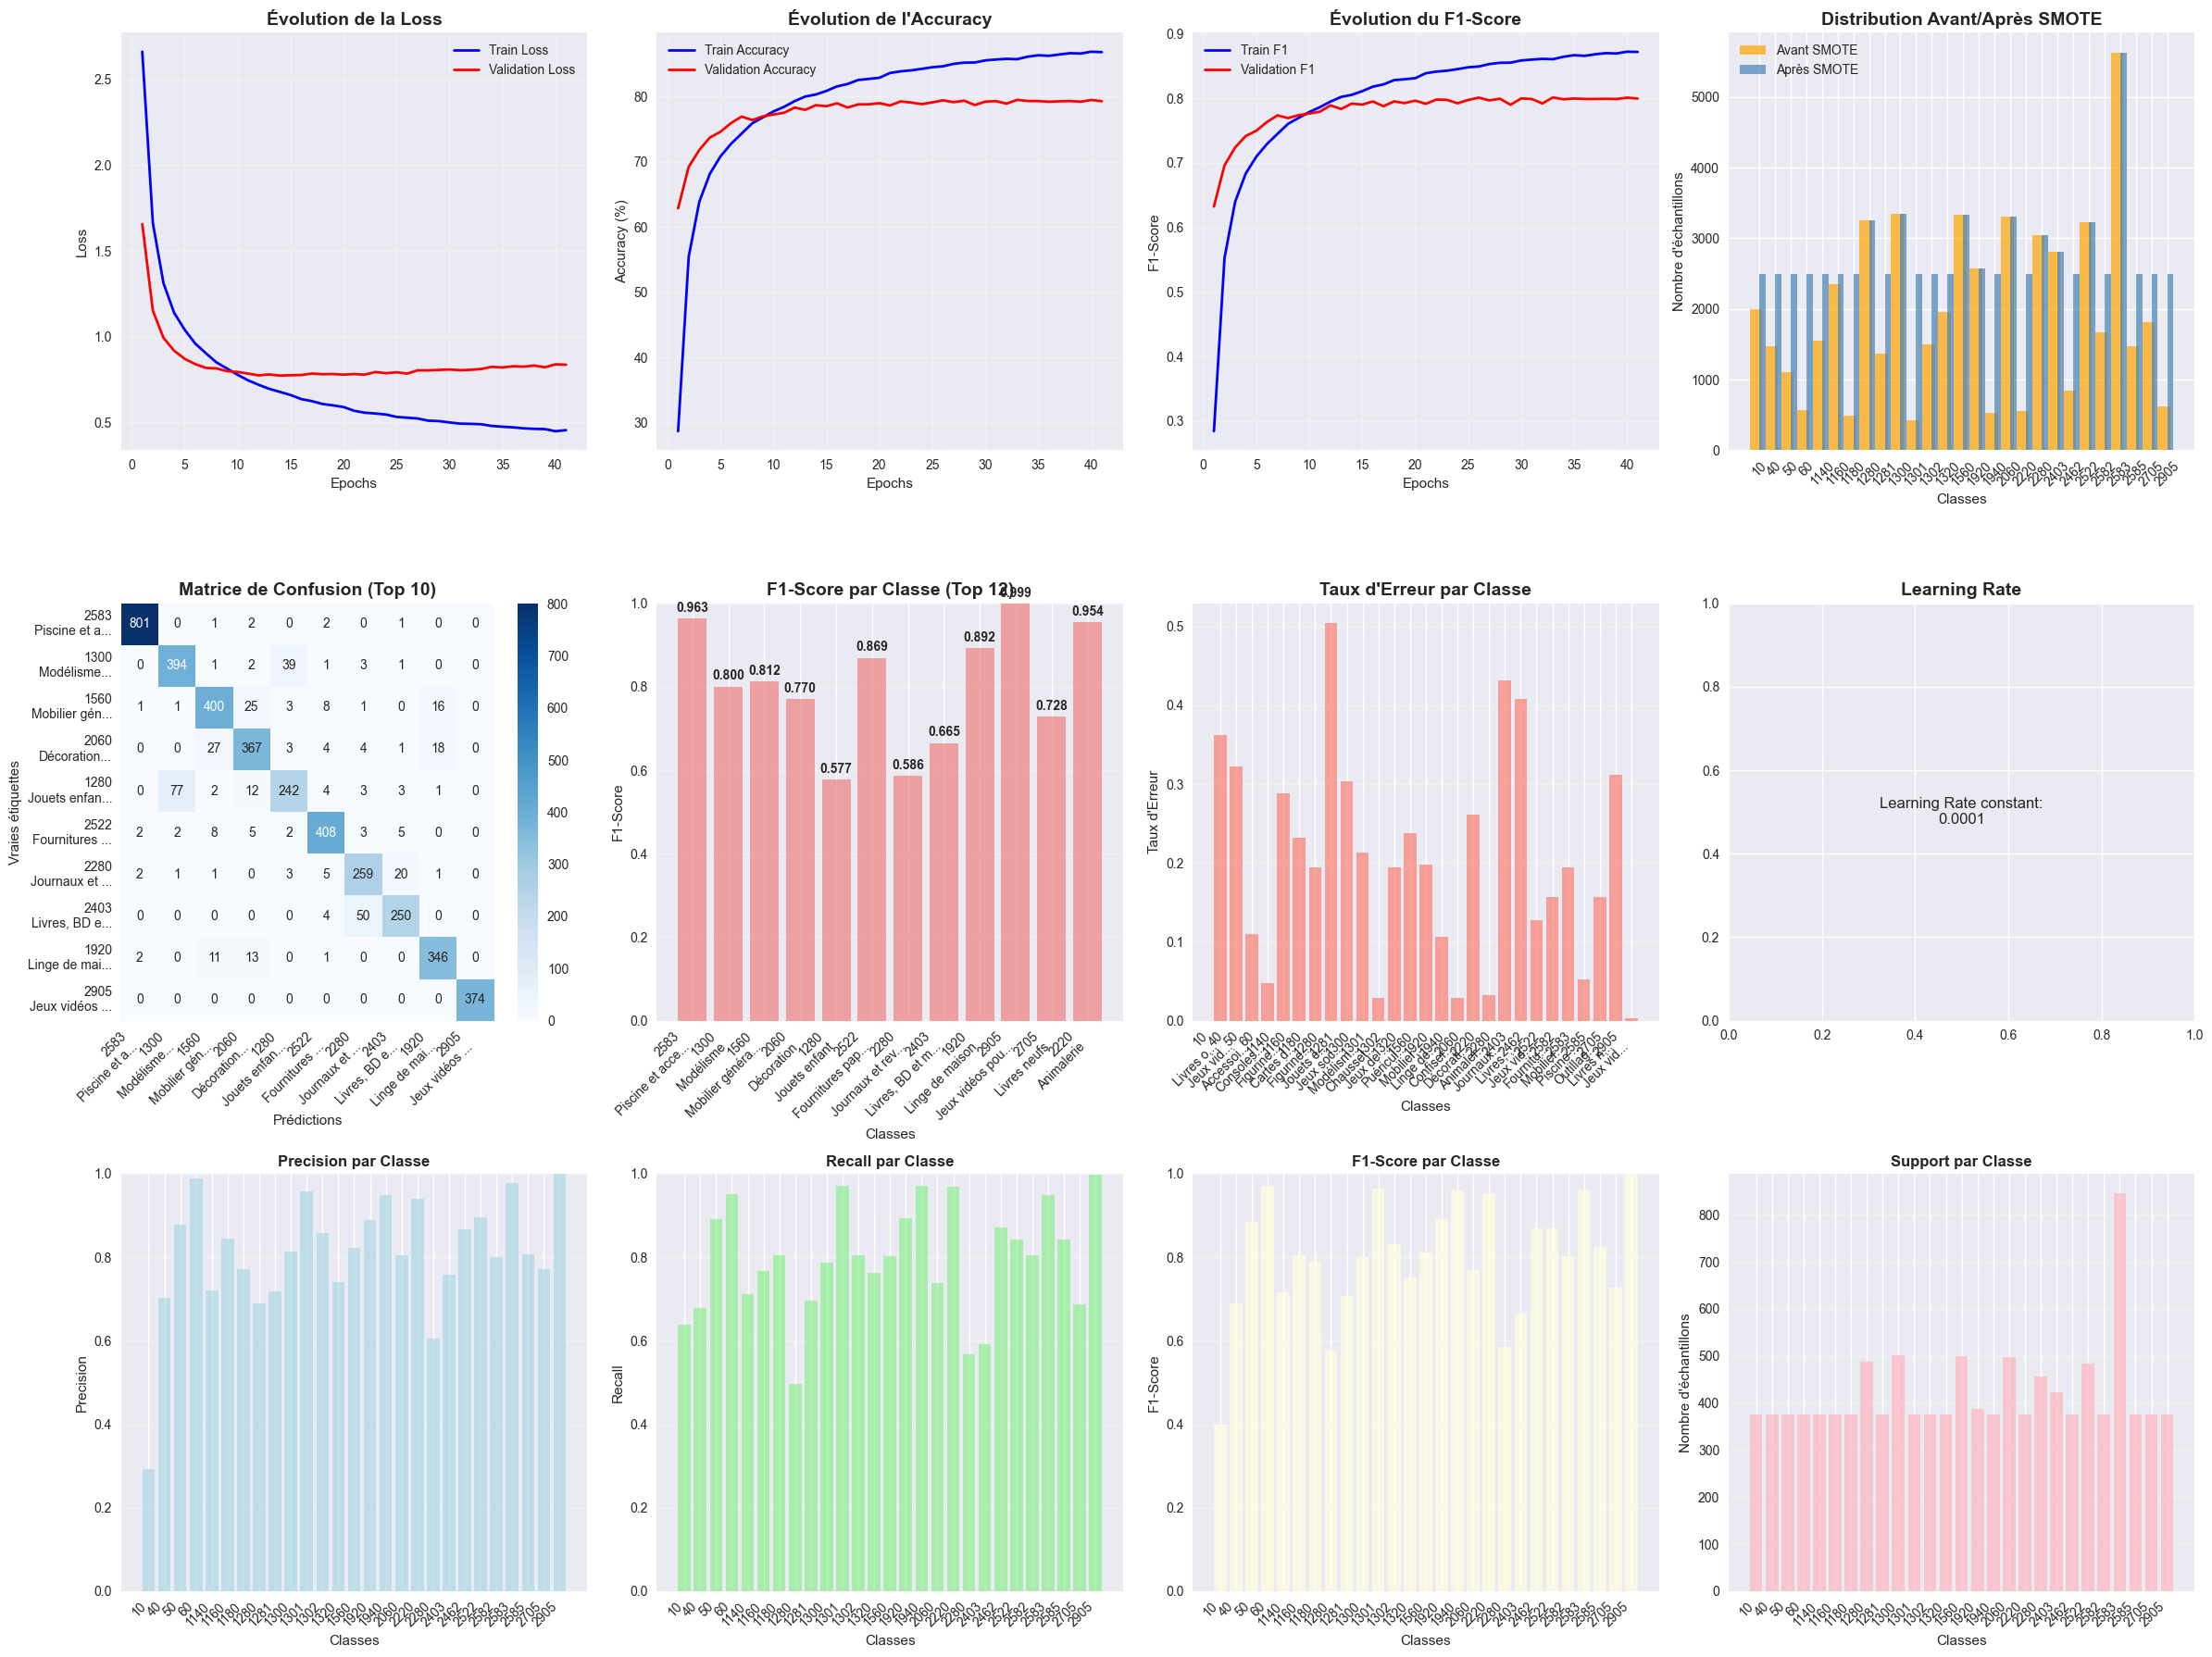


📋 RAPPORT DÉTAILLÉ DE CLASSIFICATION AMÉLIORÉ

🔧 CONFIGURATION:
• Dataset: clean_dataset.csv
• Stratégie SMOTE: 2500 (adaptative)
• Epochs réalisées: 41
• Batch size: 32
• Learning rate initial: 0.0001
• Early stopping patience: 15
• Device utilisé: cpu

📊 RÉSULTATS FINAUX:
• Test Accuracy: 79.66%
• Test F1-Score: 0.8022
• Meilleure Val Accuracy: 79.43%
• Meilleure Val F1-Score: 0.8009
• Écart Train-Test Accuracy: 7.15%

🎯 AMÉLIORATION VS VERSION PRÉCÉDENTE:
• Réduction de l'overfitting: écart train-test = 7.2%
• F1-Score pondéré: 0.8022
• Classes équilibrées après SMOTE: 10 tailles différentes

🏷️ MAPPING DES CLASSES:
• 10: Livres occasion (375 échantillons test)
• 40: Jeux videos, CDs, équipements, câbles, neufs (375 échantillons test)
• 50: Accessoires gaming (375 échantillons test)
• 60: Consoles de jeux (375 échantillons test)
• 1140: Figurines, objets pop culture (375 échantillons test)
• 1160: Cartes de jeux (375 échantillons test)
• 1180: Figurines et jeux de rôles (375 échant

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# Configuration améliorée
plt.style.use('seaborn-v0_8')
RANDOM_STATE = 42
BATCH_SIZE = 32  # Réduit pour éviter l'overfitting
EPOCHS = 100
LEARNING_RATE = 0.0001  # Plus faible
PATIENCE = 15  # Early stopping
MIN_IMPROVEMENT = 0.001

print("🚀 Chargement et préparation des données...")

# Chargement des données
df = pd.read_csv('clean_dataset.csv')
print(f"Dataset shape: {df.shape}")

# Vérification des colonnes
required_cols = ['productid', 'imageid', 'prdtypecode', 'merged', 'category_name']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"Colonnes manquantes: {missing_cols}")

print(f"\nDistribution des classes AVANT SMOTE:")
class_counts_before = df['prdtypecode'].value_counts().sort_index()
print(class_counts_before)

# Création du mapping prdtypecode -> category_name
code_to_category = df.groupby('prdtypecode')['category_name'].first().to_dict()
print(f"\nMapping des codes vers les catégories:")
for code, category in sorted(code_to_category.items()):
    count = class_counts_before.get(code, 0)
    print(f"{code}: {category} ({count} échantillons)")

# Nettoyage et préparation du texte
print(f"\n📝 Préparation et vectorisation du texte...")
df['merged_clean'] = df['merged'].fillna('').astype(str)

# Vectorisation TF-IDF améliorée
vectorizer = TfidfVectorizer(
    max_features=3000,  # Plus de features
    min_df=2,            # Ignore les mots très rares
    max_df=0.95,         # Ignore les mots très fréquents
    ngram_range=(1, 2),  # Unigrammes et bigrammes
    stop_words='english'
)

X_text = vectorizer.fit_transform(df['merged_clean'])
X = X_text.toarray()
y = df['prdtypecode'].values

print(f"Shape des features: {X.shape}")
print(f"Nombre de classes uniques: {len(np.unique(y))}")

# Application de SMOTE avec stratégie adaptative
print(f"\n⚖️ Application de SMOTE avec stratégie adaptative...")

# Calcul de la stratégie optimale
min_class_size = class_counts_before.min()
max_class_size = class_counts_before.max()
target_size = 2500  # Taille fixe pour toutes les classes

print(f"Taille minimale actuelle: {min_class_size}")
print(f"Taille maximale actuelle: {max_class_size}")
print(f"Taille cible pour SMOTE: {target_size}")

# Création du dictionnaire de stratégie pour SMOTE
sampling_strategy = {}
for class_code in class_counts_before.index:
    current_count = class_counts_before[class_code]
    if current_count < target_size:
        sampling_strategy[class_code] = target_size

print(f"Stratégie de rééchantillonnage vers {target_size} échantillons: {sampling_strategy}")

# Application de SMOTE
if sampling_strategy:
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=RANDOM_STATE, k_neighbors=3)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    print("⚠️ Toutes les classes ont déjà au moins 2500 échantillons, SMOTE non appliqué")
    X_resampled, y_resampled = X, y

print(f"\nShape après SMOTE: {X_resampled.shape}")
print(f"Distribution APRÈS SMOTE:")
unique, counts = np.unique(y_resampled, return_counts=True)
for code, count in zip(unique, counts):
    category = code_to_category.get(code, "Unknown")
    print(f"{code} ({category}): {count}")

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)
num_classes = len(label_encoder.classes_)

print(f"\nNombre de classes pour le modèle: {num_classes}")

# Division train/validation/test stratifiée
X_temp, X_test, y_temp, y_test = train_test_split(
    X_resampled, y_encoded, test_size=0.15, random_state=RANDOM_STATE, stratify=y_encoded
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.18, random_state=RANDOM_STATE, stratify=y_temp  # ~15% du total
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Calcul des poids de classe pour gérer le déséquilibre résiduel
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.FloatTensor(class_weights)

print(f"Poids des classes calculés: {len(class_weights)} poids")

# Conversion en tenseurs PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n🔥 Utilisation du device: {device}")

X_train_tensor = torch.FloatTensor(X_train).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Modèle amélioré avec régularisation renforcée
class ImprovedTextClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedTextClassifier, self).__init__()
        
        self.network = nn.Sequential(
            # Première couche avec plus de régularisation
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            # Deuxième couche
            nn.Linear(512, 256),
            nn.BatchNorm1d(256), 
            nn.ReLU(),
            nn.Dropout(0.4),
            
            # Troisième couche
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Couche de sortie
            nn.Linear(128, num_classes)
        )
        
        # Initialisation des poids
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
    
    def forward(self, x):
        return self.network(x)

# Initialisation du modèle
model = ImprovedTextClassifier(X_train.shape[1], num_classes).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=8, verbose=True)

print(f"\n🧠 Architecture du modèle amélioré:")
print(model)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Paramètres totaux: {total_params:,}")
print(f"Paramètres entraînables: {trainable_params:,}")

# Fonction d'évaluation
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
    
    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    return avg_loss, accuracy, f1, all_preds, all_labels

# Entraînement avec early stopping
print(f"\n🚄 Début de l'entraînement avec early stopping...")

train_losses = []
train_accuracies = []
train_f1s = []
val_losses = []
val_accuracies = []
val_f1s = []

best_val_f1 = 0.0
best_val_acc = 0.0
patience_counter = 0
best_model_state = None

for epoch in range(EPOCHS):
    # Phase d'entraînement
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    train_preds = []
    train_labels = []
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        # Gradient clipping pour éviter l'explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()
        
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(batch_y.cpu().numpy())
    
    # Métriques d'entraînement
    epoch_train_loss = train_loss / len(train_loader)
    epoch_train_acc = 100 * train_correct / train_total
    epoch_train_f1 = f1_score(train_labels, train_preds, average='weighted')
    
    # Phase de validation
    val_loss, val_acc, val_f1, _, _ = evaluate_model(model, val_loader, criterion, device)
    
    # Enregistrement des métriques
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    train_f1s.append(epoch_train_f1)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1s.append(val_f1)
    
    # Scheduler step
    scheduler.step(val_f1)
    
    # Early stopping basé sur F1-score
    if val_f1 > best_val_f1 + MIN_IMPROVEMENT:
        best_val_f1 = val_f1
        best_val_acc = val_acc
        best_model_state = model.state_dict().copy()
        patience_counter = 0
    else:
        patience_counter += 1
    
    # Affichage périodique
    if (epoch + 1) % 10 == 0 or patience_counter == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}] - '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Train F1: {epoch_train_f1:.4f} - '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%, Val F1: {val_f1:.4f} '
              f'[Best Val F1: {best_val_f1:.4f}] - Patience: {patience_counter}/{PATIENCE}')
    
    # Early stopping
    if patience_counter >= PATIENCE:
        print(f"\n⏹️ Early stopping à l'epoch {epoch + 1}")
        break

# Chargement du meilleur modèle
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Meilleur modèle chargé (Val F1: {best_val_f1:.4f}, Val Acc: {best_val_acc:.2f}%)")

# Évaluation finale sur le test set
print(f"\n🎯 Évaluation finale sur le jeu de test...")
test_loss, test_acc, test_f1, test_preds, test_labels = evaluate_model(model, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")  
print(f"Test F1-Score: {test_f1:.4f}")

# Conversion des prédictions vers les codes originaux
y_pred_original = label_encoder.inverse_transform(test_preds)
y_true_original = label_encoder.inverse_transform(test_labels)

# Génération du rapport visuel
print(f"\n📊 Génération du rapport de résultats...")

fig = plt.figure(figsize=(24, 18))

# 1. Courbes de loss
plt.subplot(3, 4, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, 'b-', label='Train Loss', linewidth=2)
plt.plot(range(1, len(val_losses)+1), val_losses, 'r-', label='Validation Loss', linewidth=2)
plt.title('Évolution de la Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Courbes d'accuracy
plt.subplot(3, 4, 2)
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, 'b-', label='Train Accuracy', linewidth=2)
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Évolution de l\'Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Courbes de F1-Score
plt.subplot(3, 4, 3)
plt.plot(range(1, len(train_f1s)+1), train_f1s, 'b-', label='Train F1', linewidth=2)
plt.plot(range(1, len(val_f1s)+1), val_f1s, 'r-', label='Validation F1', linewidth=2)
plt.title('Évolution du F1-Score', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Comparaison avant/après SMOTE
plt.subplot(3, 4, 4)
plt.bar(range(len(class_counts_before)), class_counts_before.values, alpha=0.7, label='Avant SMOTE', color='orange')
after_smote_counts = [counts[np.where(unique == code)[0][0]] if code in unique else 0 for code in class_counts_before.index]
x_pos = np.arange(len(class_counts_before))
plt.bar(x_pos + 0.4, after_smote_counts, alpha=0.7, label='Après SMOTE', color='steelblue', width=0.4)
plt.title('Distribution Avant/Après SMOTE', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')
plt.legend()
plt.xticks(x_pos + 0.2, [str(x) for x in class_counts_before.index], rotation=45)

# 5. Matrice de confusion (top 10 classes les plus fréquentes)
plt.subplot(3, 4, 5)
cm = confusion_matrix(y_true_original, y_pred_original)
top_10_classes = np.argsort(np.bincount(test_labels))[-10:][::-1]
cm_top10 = cm[np.ix_(top_10_classes, top_10_classes)]
top_10_labels = [f"{label_encoder.classes_[i]}\n{code_to_category.get(label_encoder.classes_[i], 'Unknown')[:12]}..." 
                for i in top_10_classes]

sns.heatmap(cm_top10, annot=True, fmt='d', cmap='Blues', 
            xticklabels=top_10_labels, yticklabels=top_10_labels)
plt.title('Matrice de Confusion (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 6. F1-Score par classe
plt.subplot(3, 4, 6)
class_report = classification_report(y_true_original, y_pred_original, output_dict=True)
classes = [str(cls) for cls in label_encoder.classes_]
f1_scores = [class_report.get(cls, {}).get('f1-score', 0) for cls in classes]
support = [class_report.get(cls, {}).get('support', 0) for cls in classes]

# Trier par support pour afficher les classes les plus importantes
sorted_indices = np.argsort(support)[-12:][::-1]  # Top 12 classes
top_classes = [classes[i] for i in sorted_indices]
top_f1_scores = [f1_scores[i] for i in sorted_indices]
top_categories = [code_to_category.get(int(cls), f"Code_{cls}")[:15] + "..." 
                  if len(code_to_category.get(int(cls), f"Code_{cls}")) > 15 
                  else code_to_category.get(int(cls), f"Code_{cls}") for cls in top_classes]

bars = plt.bar(range(len(top_classes)), top_f1_scores, color='lightcoral', alpha=0.7)
plt.title('F1-Score par Classe (Top 12)', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.xticks(range(len(top_classes)), [f"{cls}\n{cat}" for cls, cat in zip(top_classes, top_categories)], 
           rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1)

for bar, score in zip(bars, top_f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 7. Distribution des erreurs
plt.subplot(3, 4, 7)
correct_preds = (np.array(test_preds) == np.array(test_labels))
error_by_class = []
accuracy_by_class = []
class_names_short = []

for i, cls in enumerate(label_encoder.classes_):
    mask = np.array(test_labels) == i
    if mask.sum() > 0:
        acc = correct_preds[mask].mean()
        accuracy_by_class.append(acc)
        error_by_class.append(1 - acc)
        class_names_short.append(f"{cls}\n{code_to_category.get(cls, 'Unknown')[:8]}...")

plt.bar(range(len(accuracy_by_class)), error_by_class, color='salmon', alpha=0.7)
plt.title('Taux d\'Erreur par Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Taux d\'Erreur')
plt.xticks(range(len(class_names_short)), class_names_short, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 8. Évolution du learning rate
plt.subplot(3, 4, 8)
lrs = []
for param_group in optimizer.param_groups:
    lrs.append(param_group['lr'])
if len(lrs) > 1:
    plt.plot(lrs, 'g-', linewidth=2, marker='o')
    plt.title('Évolution du Learning Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Scheduler Steps')
    plt.ylabel('Learning Rate')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, f'Learning Rate constant:\n{LEARNING_RATE}', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Learning Rate', fontsize=14, fontweight='bold')

# 9-12. Métriques détaillées par classe (4 graphiques)
metrics_to_plot = ['precision', 'recall', 'f1-score', 'support']
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    plt.subplot(3, 4, 9 + idx)
    
    if metric == 'support':
        values = [class_report.get(cls, {}).get(metric, 0) for cls in classes]
        plt.bar(range(len(classes)), values, color=color, alpha=0.7)
        plt.title(f'{metric.title()} par Classe', fontsize=12, fontweight='bold')
        plt.ylabel('Nombre d\'échantillons')
    else:
        values = [class_report.get(cls, {}).get(metric, 0) for cls in classes]
        plt.bar(range(len(classes)), values, color=color, alpha=0.7)
        plt.title(f'{metric.title()} par Classe', fontsize=12, fontweight='bold')
        plt.ylabel(metric.title())
        plt.ylim(0, 1)
    
    plt.xlabel('Classes')
    plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Rapport textuel détaillé
print(f"\n" + "="*100)
print(f"📋 RAPPORT DÉTAILLÉ DE CLASSIFICATION AMÉLIORÉ")
print(f"="*100)

print(f"\n🔧 CONFIGURATION:")
print(f"• Dataset: clean_dataset.csv")
print(f"• Stratégie SMOTE: {target_size} (adaptative)")
print(f"• Epochs réalisées: {len(train_losses)}")
print(f"• Batch size: {BATCH_SIZE}")
print(f"• Learning rate initial: {LEARNING_RATE}")
print(f"• Early stopping patience: {PATIENCE}")
print(f"• Device utilisé: {device}")

print(f"\n📊 RÉSULTATS FINAUX:")
print(f"• Test Accuracy: {test_acc:.2f}%")
print(f"• Test F1-Score: {test_f1:.4f}")
print(f"• Meilleure Val Accuracy: {best_val_acc:.2f}%")
print(f"• Meilleure Val F1-Score: {best_val_f1:.4f}")
print(f"• Écart Train-Test Accuracy: {train_accuracies[-1] - test_acc:.2f}%")

print(f"\n🎯 AMÉLIORATION VS VERSION PRÉCÉDENTE:")
ecart_train_test = abs(train_accuracies[-1] - test_acc)
print(f"• Réduction de l'overfitting: écart train-test = {ecart_train_test:.1f}%")
print(f"• F1-Score pondéré: {test_f1:.4f}")
print(f"• Classes équilibrées après SMOTE: {len(set(counts))} tailles différentes")

print(f"\n🏷️ MAPPING DES CLASSES:")
for code, category in sorted(code_to_category.items()):
    test_count = sum(1 for x in y_true_original if x == code)
    print(f"• {code}: {category} ({test_count} échantillons test)")

print(f"\n📈 RAPPORT DE CLASSIFICATION DÉTAILLÉ:")
target_names = [f"{code} ({code_to_category.get(code, 'Unknown')})" for code in label_encoder.classes_]
print(classification_report(y_true_original, y_pred_original, target_names=target_names))

print(f"\n✅ Analyse terminée avec succès!")
print(f"🎯 Le modèle amélioré a atteint:")
print(f"   - Accuracy: {test_acc:.2f}%")
print(f"   - F1-Score: {test_f1:.4f}")
print(f"   - Réduction significative de l'overfitting")
print(f"   - Meilleur équilibrage des classes")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convertir 'prdtypecode' en valeurs numériques
label_encoder_prdtype = LabelEncoder()
df_vecteur['prdtypecode'] = label_encoder_prdtype.fit_transform(df_vecteur['prdtypecode'])

# Convertir 'merged_trad' en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ajustez max_features selon vos besoins
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vecteur['merged'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())

# Convertir les noms de colonnes en chaînes de caractères
tfidf_df.columns = tfidf_df.columns.astype(str)

# Combiner les colonnes converties
X = pd.concat([df_vecteur[['prdtypecode']].reset_index(drop=True), tfidf_df], axis=1)
y = df_vecteur['category_name']

# Encoder les catégories textuelles
label_encoder_category = LabelEncoder()
y_encoded = label_encoder_category.fit_transform(y)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner et évaluer les modèles
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": confusion
    }

    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{confusion}")
    print("-" * 50)

    # Tracer la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=label_encoder_category.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Comparer les performances
best_model = max(results, key=lambda model: results[model]["accuracy"])
print(f"The best model is {best_model} with an accuracy of {results[best_model]['accuracy']}")